In [1]:
from nltk import sent_tokenize, pos_tag
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.util import mark_negation
from string import punctuation
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### Sentiment Scoring Using SentiWordNet

In [2]:
def penn_to_wn(tag):
    """
        Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [3]:
def get_sentiment_score(text):
    
    """
        This method returns the sentiment score of a given text using SentiWordNet sentiment scores.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0
    #print(text)
    raw_sentences = sent_tokenize(text)
    #print(raw_sentences)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        #print(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        tags = pos_tag(tokens)
        for word, tag in tags:
            wn_tag = penn_to_wn(tag)
            if not wn_tag:
                continue
            lemma = WordNetLemmatizer().lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sent_score += swn_synset.pos_score() - swn_synset.neg_score()

        total_score = total_score + (sent_score / len(tokens))

    
    return (total_score / len(raw_sentences)) * 100

In [4]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [17]:
# reviews = pd.read_csv("../data/small_corpus.csv")
reviews = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sentiment_analysis_nlp/Sentiment_Analysis_NLP_for_Marketting/data/small_corpus.csv")

In [18]:
reviews.shape

(4500, 12)

In [ ]:
reviews.head()

In [20]:
reviews.dropna(subset=['reviewText'], inplace=True)

In [19]:
reviews.shape

(4500, 12)

In [21]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('sentiwordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [22]:
reviews['swn_score'] = reviews['reviewText'].apply(lambda text : get_sentiment_score(text))

In [23]:
reviews[['reviewText','swn_score']].sample(2)

,reviewText,swn_score
4318,"Pros:\n>macro/custom bind functionality is fantastic\n>good tactile feedback\n>very durable; does not bow/bend much\n>good cord length\n\nCons:\n>the num-Enter key has two contacts beneath it, yet only one works. The key is functional, but you have to press the TOP of the key for it to work\n>I personally don't like blue lighting, but this product specifically advertised it, so I can't complain",4.218750
1593,Definitely offers protection but it fits too tightly to the Vita. May have ruined my left stick.,2.777778


In [24]:
reviews[['reviewText','swn_score']].sample(2)

reviewText  \
4469  The Adventure's Prelude:\n\nIf you are new to Myst, you must understand the whole idea behind it, or Myst IV Revelation (M4R) will probably not make sense at all.\n\nThe original Myst introduced the concept of "Linking Books", special books written by a few gifted people from the D'ni civilization.  These people used the Art to conceive and "write" entire worlds known as "Ages" accessible only through these same books, hence the name, linking books.\n\nMyst also introduces Atrus, his wife Catherine  and his two sons, Sirrus and Achenar.  In the original adventure, Sirrus and Achenar ended up trapped in separate "ages" written by their father Atrus after he found out that their greed led them to abuse their power against the peaceful inhabitants of these conceived worlds.  M4R begins 20 years after these events, finding Atrus in the age of Tomahna regretting his decision of trapping his sons and asking for your help in finding out if they have truly changed for good.  M4R also presents Yeesha, Atrus and Catherine's daughter introduced originally in Myst III Exile.\n\nReality Check:\n\nI totally understand the frustration expressed by other reviewers not only with M4R's game play, but also with the technical difficulties of making it work.  Very well put from a reviewer who said that getting M4R to work was a puzzle in itself.\n\nI also suffered from technical difficulties, not while setting up or starting the game mind you, but in an advanced stage of it, which made it worse as I was already immersed in the whole adventure.  I solved this difficult "technical" side-puzzle (this is a good spoiler) by re-installing M4R after applying a driver update to my Nvidia card, then applying the latest M4R patch (1.03 as of this writing) and restarting the game with the antivirus off.  The M4R patch can be easily found with any search engine.\n\nM4R's Heart - The Puzzles:\n\nAnd they are all over; and I believe that most of them are intentionally placed right in your face, to bait you into a false sense of discovery and accomplishment.  The sad reality is that these puzzles will not make sense at all the first time around.  Clicking all buttons or pulling all the levers or shuffling stuff around will only make matters worse.  You need to be systematic from the start, watching closely their initial state, leaving them intact until you collect more clues around the Age or world, and come back to them when they start making sense.  Puzzles are not logical unless you put them in the context of the story.  For this it's necessary to explore, read, observe and listen to everything, take a lot of pictures and write notes.  Don't expect to see a puzzle and start making combinations until you get the right one; they were designed in such a way that the combinations are too many to make this a logical approach.  As another reviewer stated, you have to take it easy and explore patiently, relaxed, sipping your favorite drink (I bet a glass of wine goes great with Serenia's exotic mind-benders)\n\nIf you have played any previous Myst adventures (Myst, Riven, Exile, etc.) you will immediately notice that the puzzles in M4R are more involved, but in general the original concept or idea is there; you will have to put together clues and explore deeply in order to solve them.  You will also find that M4R's puzzles are not limited to physical machines and gadgetries, there are also puzzles involving surreal events.  If that's not enough, time limitations were added to a few puzzles to make them a bit more "interesting".\n\nM4R is not recommended for impatient adventurers.  You will require extreme patience, and must set aside some time to solve many puzzles (There are a few of them where you can not save until they are completed, and believe me, they DO take SOME time to solve)\n\nI was able to complete M4R despite the fact that I had to stop for a few weeks, not only because of the technical difficulties mentioned previously, but also be

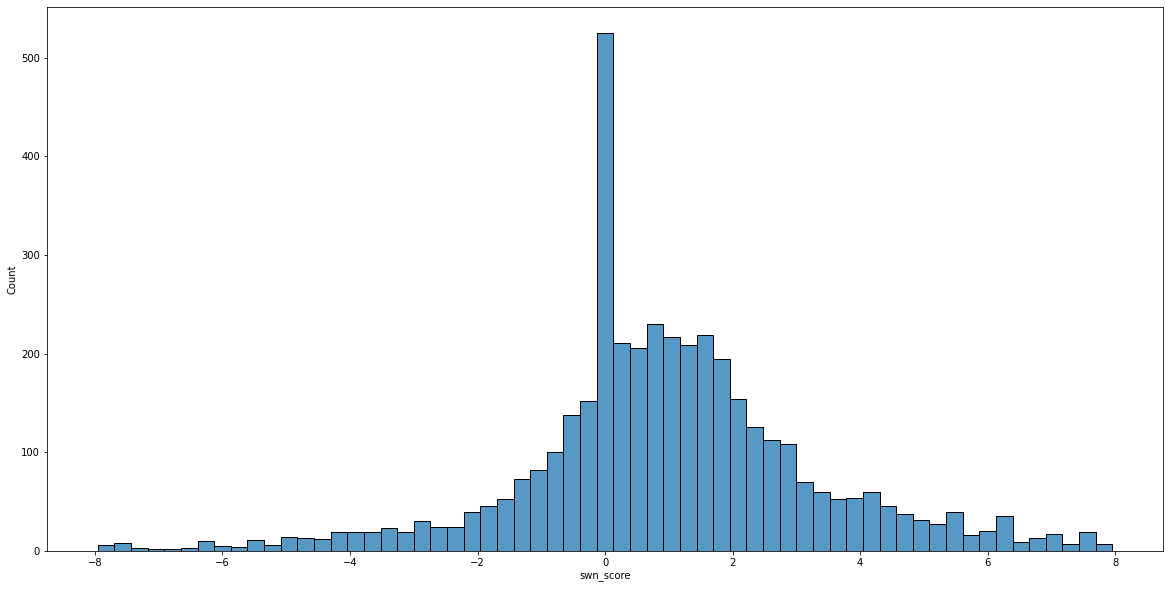

In [25]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='swn_score', data=reviews.query("swn_score < 8 and swn_score > -8"), ax=ax)
plt.show()

In [33]:
reviews['swn_sentiment'] = reviews['swn_score'].apply(lambda x: "positive" if x>1 else ("negative" if x<0.5 else "neutral"))

In [34]:
reviews['swn_sentiment'].value_counts(dropna=False)

positive    2198
negative    1861
neutral      440
Name: swn_sentiment, dtype: int64

<AxesSubplot:xlabel='overall', ylabel='count'>

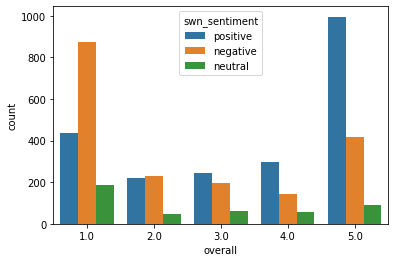

In [35]:
sns.countplot(x='overall', hue='swn_sentiment' ,data = reviews)

<AxesSubplot:xlabel='swn_sentiment', ylabel='overall'>

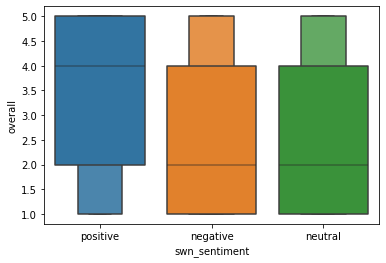

In [36]:
sns.boxenplot(x='swn_sentiment', y='overall', data = reviews)

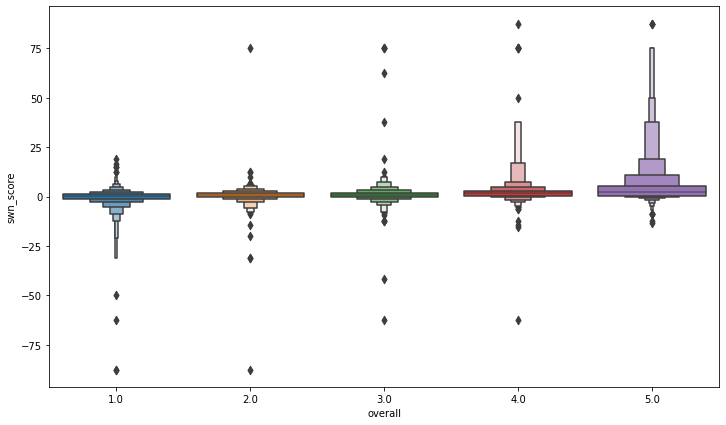

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='swn_score', data = reviews, ax=ax)
plt.show()

In [38]:
reviews['true_sentiment'] = \
    reviews['overall'].apply(lambda x: "positive" if x>=4 else ("neutral" if x==3 else "negative"))

In [39]:
y_swn_pred, y_true = reviews['swn_sentiment'].tolist(), reviews['true_sentiment'].tolist()

In [40]:
len(y_swn_pred), len(y_true)

(4499, 4499)

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_swn_pred)

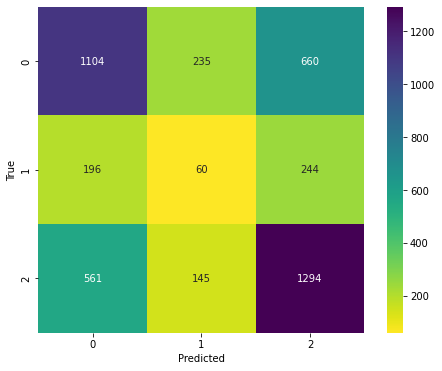

In [42]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

## Performance Assessment

### Negative Sentiment Prediction Assessment

In [43]:
tp, tn, fp, fn = 1088, 70+242+142+1310, 265+647, 188+547

In [44]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

In [45]:
print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.5968184311574328
precission: 0.544
f1 score: 0.5691865027465342


### Positive Sentiment Prediction Assessment

In [46]:
tp, tn, fp, fn = 1310, 1088+265+70+188, 242+647, 142+547

In [47]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

In [48]:
print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.655327663831916
precission: 0.5957253296953161
f1 score: 0.6241067174845164


## Sentiment Scoring Model Using NLTK Opinion Lexicon

In [49]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize, sent_tokenize

In [50]:
nltk.download("opinion_lexicon")

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


True

In [51]:
pos_words = list(opinion_lexicon.positive())
neg_words = list(opinion_lexicon.negative())

In [52]:
def get_sentiment_score_oplex(text):
    
    """
        This method returns the sentiment score of a given text using nltk opinion lexicon.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0

    raw_sentences = sent_tokenize(text)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        for token in tokens:
            sent_score = sent_score + 1 if token in pos_words else (sent_score - 1 if token in neg_words else sent_score)
        total_score = total_score + (sent_score / len(tokens))

    
    return total_score

In [53]:
reviews['oplex_sentiment_score'] = reviews['reviewText'].apply(lambda x: get_sentiment_score_oplex(x))

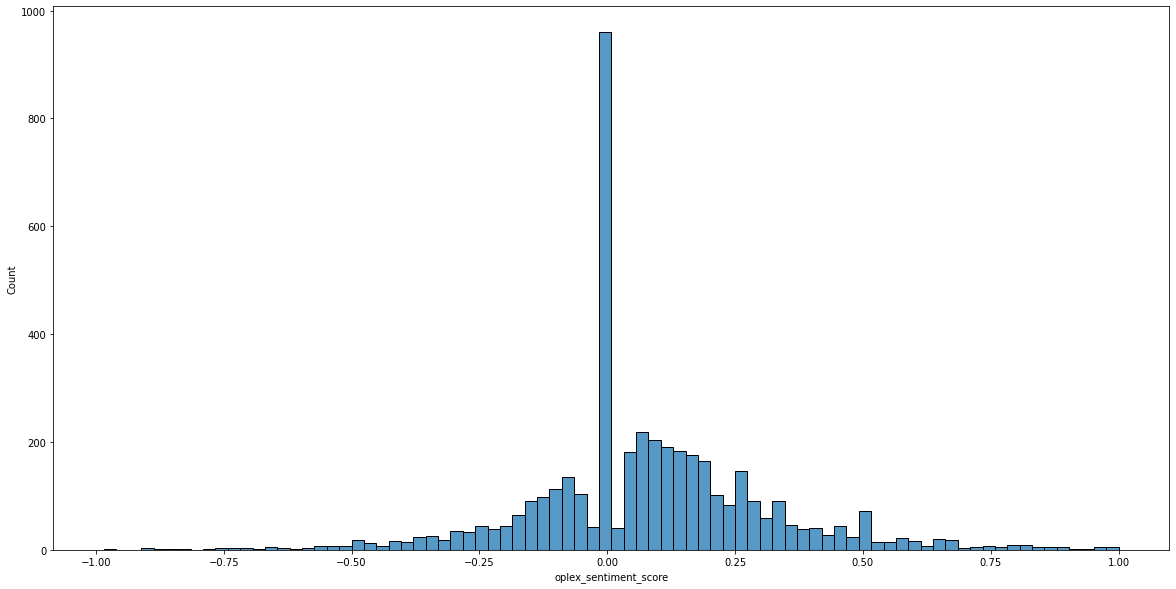

In [54]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='oplex_sentiment_score',\
             data=reviews.query("oplex_sentiment_score < 1 and oplex_sentiment_score>-1"), ax=ax)
plt.show()

In [55]:
reviews['oplex_sentiment'] = \
    reviews['oplex_sentiment_score'].apply(lambda x: "positive" if x>0.1 else ("negative" if x<0 else "neutral"))

In [56]:
reviews['oplex_sentiment'].value_counts(dropna=False)

positive    1867
neutral     1574
negative    1058
Name: oplex_sentiment, dtype: int64

<AxesSubplot:xlabel='overall', ylabel='count'>

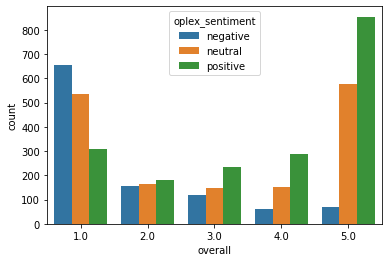

In [57]:
sns.countplot(x='overall', hue='oplex_sentiment' ,data = reviews)

<AxesSubplot:xlabel='oplex_sentiment', ylabel='overall'>

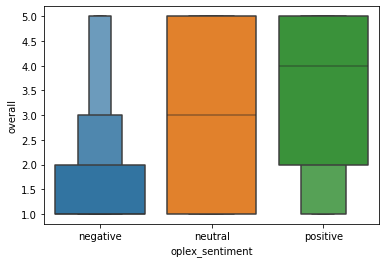

In [58]:
sns.boxenplot(x='oplex_sentiment', y='overall', data = reviews)

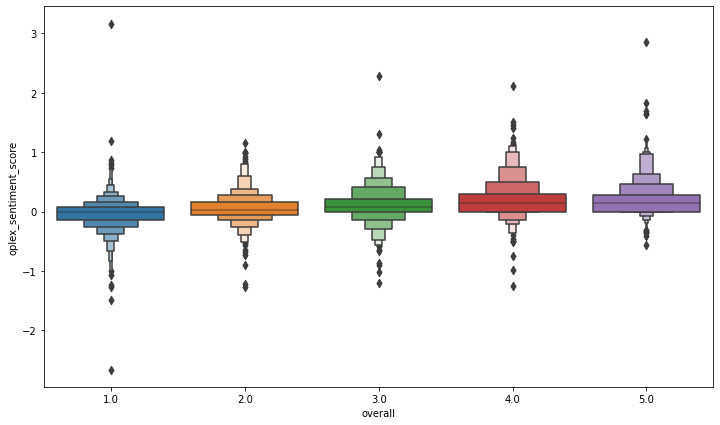

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='oplex_sentiment_score', data = reviews, ax=ax)
plt.show()

In [60]:
y_oplex_pred = reviews['oplex_sentiment'].tolist()

In [61]:
oplex_cm = confusion_matrix(y_true, y_oplex_pred)

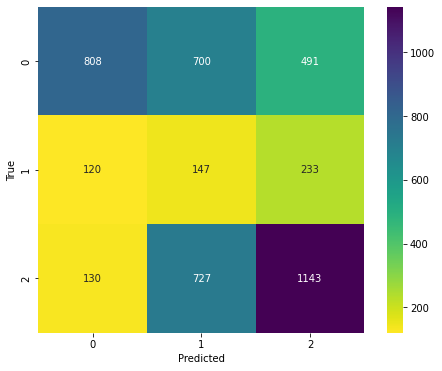

In [62]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(oplex_cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

In [63]:
oplex_cm = list(oplex_cm.ravel())

In [64]:
oplex_cm

[808, 700, 491, 120, 147, 233, 130, 727, 1143]

### Negative Label Assessment

In [65]:
tp, tn, fp, fn = 804, 195+199+686+1181, 106+132, 701+495

In [66]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.402
precission: 0.7715930902111324
f1 score: 0.5285996055226825


### Positive Label Assessment

In [67]:
tp, tn, fp, fn = 1181, 804+701+106+195, 495+199, 132+686

In [69]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.5907953976988495
precission: 0.6298666666666667
f1 score: 0.6097057305110997
